# **Montar drive**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/dataset')
print(os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/dataset


# **Librerías**

In [2]:
import numpy as np
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
import skimage.color as color
sns.set_theme()
import skimage.io as io
import cv2, PIL, glob, pathlib
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import keras.utils as image
import cv2
import cv2 as cv
from PIL import Image
import time

# **Cargando las clases del dataset**

In [3]:
ruta = './' #ruta donde están las carpetas de las clases
entradas_dir = os.listdir( ruta ) #listdir() devuelve una lista que contiene los nombres de las entradas en el directorio dado por ruta.
for carpeta in entradas_dir: #recorremos toda la carpeta "dataset", la cual contiene cada carpeta de cada clase
  print(carpeta)

diabetic_retinopathy
cataract
glaucoma
normal


In [4]:
entradas_diabetic = os.listdir('./diabetic_retinopathy')
entradas_cataract = os.listdir('./cataract')
entradas_glaucoma = os.listdir('./glaucoma')
entradas_normal = os.listdir('./normal')

t = (len(entradas_diabetic), len(entradas_cataract), len(entradas_glaucoma), len(entradas_normal))

print("Cantidad de imagenes:")
print("\nRetinopatía diabetica:",len(entradas_diabetic))
print("Cataratas:",len(entradas_cataract))
print("Glaucoma:",len(entradas_glaucoma))
print("Normal:",len(entradas_normal))
print("\nTotal: ", sum(t))

Cantidad de imagenes:

Retinopatía diabetica: 1098
Cataratas: 1038
Glaucoma: 1007
Normal: 1074

Total:  4217


<BarContainer object of 4 artists>

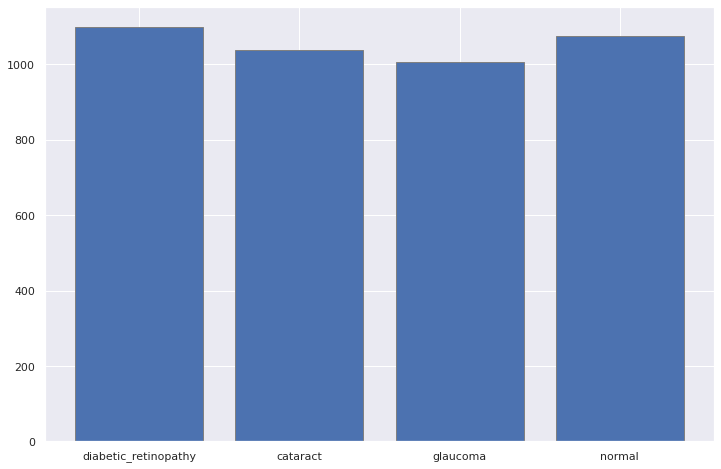

In [5]:
fig = plt.subplots(figsize =(12, 8))
count_clases = [len(entradas_diabetic), len(entradas_cataract), len(entradas_glaucoma), len(entradas_normal)]
plt.bar(entradas_dir, count_clases, color ='b', edgecolor ='grey', label ='IT')

# **Muestra de imagenes**

In [209]:
X_mostrar = [] #imagenes para mostrar y utilizar en las redes neuronales
y_mostrar = []
label_dict = {x:i for i, x in enumerate(entradas_dir)} #se crea un diccionario que tiene como keys las clases y como valores de estas keys, 0, 1, 2 y 3
                                                       #este se crea para cuando estemos guardando los pixeles de las imagenes en X, también se guarde su respectiva etiqueta
                                                       #según la clase de la imagen leida 
tamaño=64
for clase in entradas_dir:
    ruta_clase_actual = os.path.join(ruta, clase)
    for i, img_nombre in enumerate(os.listdir(ruta_clase_actual)):
        img = cv2.imread(os.path.join(ruta_clase_actual, img_nombre)) #lee y carga una imagen en especifica de la ruta actual. Devuelve una np.array
        imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
        img_array = Image.fromarray(imgRGB) #toma el objeto array como entrada y devuelve un objeto imagen hecho del objeto array (para redimensionarla)
        img_resized = img_array.resize((tamaño, tamaño))
        X_mostrar.append(np.array(img_resized))
        y_mostrar.append(label_dict[clase])

In [210]:
print(label_dict['cataract'])

1


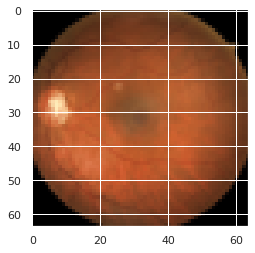

(64, 64, 3)


In [211]:
plt.imshow(X_mostrar[0]) #mostramos de la lista X, la primera imagen (de tipo array)
plt.show()
print(X_mostrar[0].shape)

### **Dimensiones de las array resultantes (de la muestra)**

In [212]:
X_mostrar = np.array(X_mostrar) #convertimos la lista de arrays en una array de arrays para poder visualizar las imagenes.
y_mostrar = np.array(y_mostrar)

print('Imagenes: {} \nLabels : {}'.format(X_mostrar.shape , y_mostrar.shape))
#Imagenes tiene 4217 arrays de 128x128x3
#Labels es básicamente es una array que tiene una tupla con 4217 valores (los valores son las etiquetas de todas la imagenes del dataset)

Imagenes: (4217, 64, 64, 3) 
Labels : (4217,)


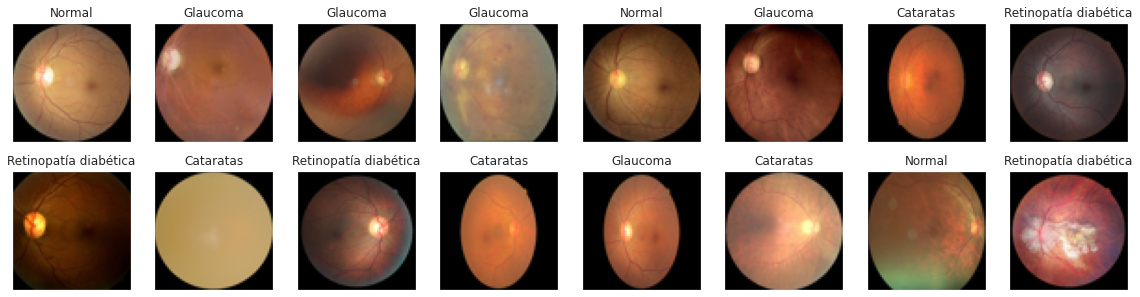

In [213]:
plt.figure(1, figsize=(20,5))
n=0
for i in range(16):
  n += 1
  r = np.random.randint(0, X_mostrar.shape[0], 1)
  plt.subplot(2, 8, n) #numero de filas y cantidad de columnas de la grafica
  plt.imshow(X_mostrar[r[0]])

  if y_mostrar[r[0]] == 0:
    plt.title('{}'.format('Retinopatía diabética'))
  if y_mostrar[r[0]] == 1:
    plt.title('{}'.format('Cataratas'))
  if y_mostrar[r[0]] == 2:
    plt.title('{}'.format('Glaucoma'))
  if y_mostrar[r[0]] == 3:
    plt.title('{}'.format('Normal'))
  plt.xticks([]), plt.yticks([])

plt.show()

###Comprobación de que solo tomamos un solo canal de las imagenes en blanco y negro

In [214]:
X_test = []
test_img = cv2.imread(os.path.join("cataract", "_0_4015166.jpg"))
test_imgRGB = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
print(test_imgRGB.shape)
X_test.append(test_imgRGB.flatten())
X_test = np.array(X_test)
X_test.shape

(256, 256, 3)


(1, 196608)

In [215]:
X_test = []
test_img = cv2.imread(os.path.join("cataract", "_0_4015166.jpg"))
print(test_img.shape)
test_imgRGB = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)
print(test_imgRGB.shape)
X_test.append(test_imgRGB.flatten())
X_test = np.array(X_test)
X_test.shape

(256, 256, 3)
(256, 256)


(1, 65536)

# **Tratamiento de imagenes y etiquetas**

In [6]:
X = [] 
y = [] 

label_dict = {x:i for i, x in enumerate(entradas_dir)}
print(label_dict)

{'diabetic_retinopathy': 0, 'cataract': 1, 'glaucoma': 2, 'normal': 3}


In [7]:
tamaño=64

for clase in entradas_dir:
    ruta_clase_actual = os.path.join(ruta, clase)
    for i, img_nombre in enumerate(os.listdir(ruta_clase_actual)):
        img = cv2.imread(os.path.join(ruta_clase_actual, img_nombre)) #lee y carga una imagen en especifica de la ruta actual. Devuelve una array
        imgGRAY = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(imgGRAY, (tamaño, tamaño))
        X.append(img_resized.flatten()) #devuelve una copia del array colapsado a una única dimensión y esta la añadidos en la lista X
        y.append(label_dict[clase])

In [8]:
print('Tamaño de X: {} \nTamaño de y: {}'.format(len(X),len(y)))

Tamaño de X: 4217 
Tamaño de y: 4217


###*Cargando una imagen en especifico para probar en ámbos problemas*

###***Creación del dataframe (ejemplo)***

In [9]:
dataset_oculares = pd.DataFrame(X)
dataset_oculares['label'] = np.array(y)

In [10]:
dataset_oculares.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,5,16,15,120,124,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#X = dataset_oculares.iloc[:, 0:4095].values
#y = dataset_oculares.iloc[:, 4096].values

### **Dimensiones de las array para los modelos de clasificación**

In [12]:
X = np.array(X) 
y = np.array(y)

print('Imagenes: {} \nLabels : {}'.format(X.shape , y.shape))

Imagenes: (4217, 4096) 
Labels : (4217,)


# **Partición de los datos para entrenamiento y testeo**
Las proporciones a utilizar son:


*   80% de las imagenes para train
*   20% de las imagenes para test



In [13]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 68)

print('Cantidad y dimensión de los datos de: \nEntrenamiento: {} \nTest: {}'.format(X_train.shape, X_test.shape))
#3373 imagenes y cada una con 4096 "caracteristicas (pixeles)" 

Cantidad y dimensión de los datos de: 
Entrenamiento: (3373, 4096) 
Test: (844, 4096)


In [14]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# **Modelos de clasificación (sin PCA)**

### **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
inicio = time.time()
estimadorGNB = GaussianNB()
estimadorGNB.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimadorGNB.predict(X_test)
print("accuracy test: %.8f"%accuracy_score(estimadorGNB.predict(X_test), y_test))
print("accuracy train: %.8f"%accuracy_score(estimadorGNB.predict(X_train), y_train))


accuracy test: 0.43127962
accuracy train: 0.43462793
Tiempo de ejecución: 0.6780638694763184


In [ ]:
#print("Predicciones:" , predicciones)
#print("Ground truth:", y_test)
#print(predicciones.shape)

In [ ]:
score = cross_val_score(estimadorGNB, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)) #Esto quiere decir que hacemos 10 entrenamientos independientes.
print("accuracy score: %.8f (+/- %.5f)"%(np.mean(score), np.std(score))) #El Accuracy final será el promedio de las 10 accuracies anteriores.

accuracy score: 0.43205995 (+/- 0.01676)


In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, predicciones)
print(cnf_matrix)

[[133  13  68  19]
 [ 12  44 142   0]
 [  2   5 187   0]
 [  1  13 205   0]]


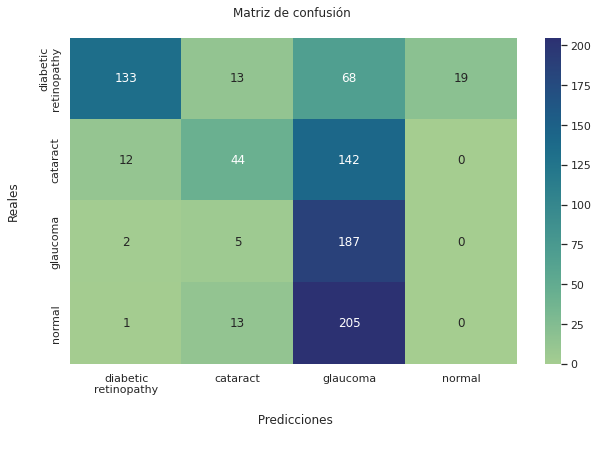

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70       233
           1       0.59      0.22      0.32       198
           2       0.31      0.96      0.47       194
           3       0.00      0.00      0.00       219

    accuracy                           0.43       844
   macro avg       0.45      0.44      0.37       844
weighted avg       0.46      0.43      0.38       844



In [ ]:
estimadorGNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

### **DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

inicio = time.time()

est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

#print("%.3f"%accuracy_score(est.predict(X_test), y_test))
predicciones = est.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(est.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(est.predict(X_train), y_train))



Tiempo de ejecución: 5.798376798629761
accuracy test: 0.716
accuracy train: 0.760


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
predicciones = est.predict(X_test)
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.716 (+/- 0.01449)


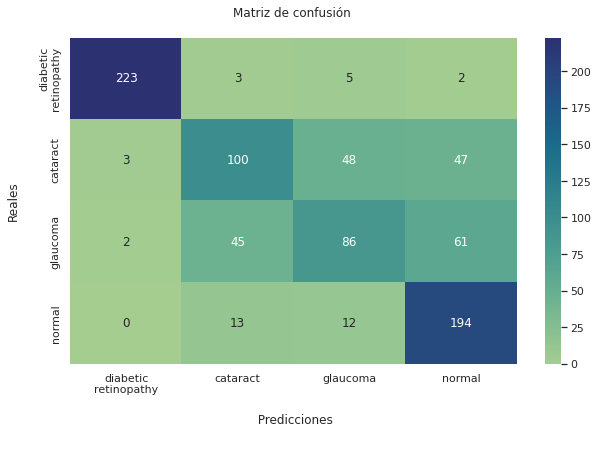

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       233
           1       0.62      0.51      0.56       198
           2       0.57      0.44      0.50       194
           3       0.64      0.89      0.74       219

    accuracy                           0.71       844
   macro avg       0.70      0.70      0.69       844
weighted avg       0.71      0.71      0.70       844



####**¿Por qué una profundidad igual a 6?**

In [ ]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    x_train_pred = dtree.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

In [ ]:
print(Acu_test)
print(Acu_train)

[0.4289, 0.5118, 0.596, 0.6505, 0.6813, 0.7168, 0.6967, 0.7216, 0.7192, 0.7168, 0.7085, 0.718, 0.7133, 0.7062, 0.7085, 0.7014, 0.7026, 0.6931, 0.6825, 0.6919, 0.6931, 0.6955, 0.6884, 0.6848, 0.6836, 0.6872, 0.6789, 0.6908, 0.6789, 0.6979, 0.6979]
[0.4183, 0.4874, 0.5855, 0.6795, 0.7157, 0.7602, 0.7776, 0.81, 0.8384, 0.8562, 0.879, 0.8992, 0.9119, 0.922, 0.9354, 0.941, 0.9499, 0.9623, 0.9695, 0.9772, 0.9837, 0.9867, 0.9896, 0.9908, 0.9914, 0.9932, 0.9944, 0.9953, 0.9961, 0.9964, 0.9973]


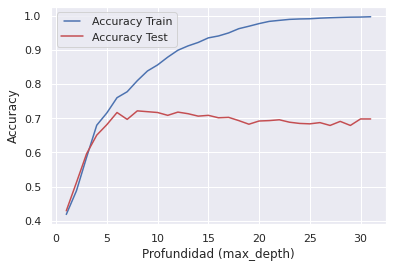

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimador = RandomForestClassifier(max_depth=6, n_estimators=120)
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimador.predict(X_test)
#print(accuracy_score(estimador.predict(X_test), y_test))
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))

Tiempo de ejecución: 10.07237434387207
accuracy test: 0.757
accuracy train: 0.812


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimador = RandomForestClassifier(max_depth=6, n_estimators=120)
estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.766 (+/- 0.00809)


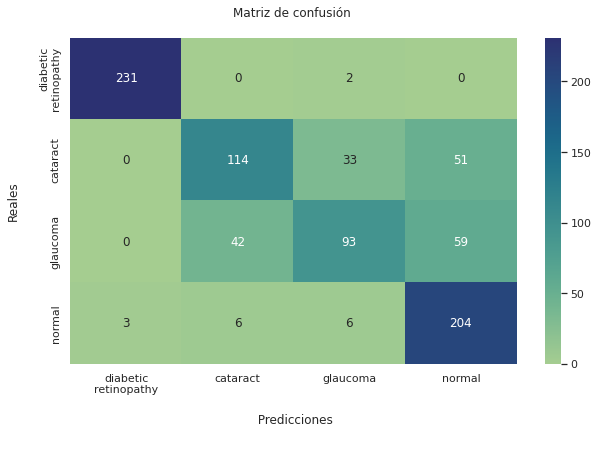

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       233
           1       0.70      0.58      0.63       198
           2       0.69      0.48      0.57       194
           3       0.65      0.93      0.77       219

    accuracy                           0.76       844
   macro avg       0.76      0.74      0.74       844
weighted avg       0.77      0.76      0.75       844



####**¿Por qué una profundidad igual a 6?**

In [ ]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    rforest = RandomForestClassifier(max_depth=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

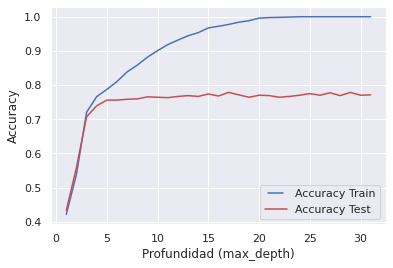

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

####**¿Por qué una generación de árboles de 120 ?**

In [ ]:
Acu_test_random = []
Acu_train_random = []
for i in range(100, 520, 20):
    rforest = RandomForestClassifier(max_depth=6, n_estimators=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test_random.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train_random.append(round(accuracy_score(y_train,x_train_pred),4))
    print(i)

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [ ]:
print(Acu_test_random)
print(Acu_train_random)

[0.7547, 0.7607, 0.7536, 0.7488, 0.7559, 0.7547, 0.7547, 0.7595, 0.7595, 0.7524, 0.7559, 0.7512, 0.7559, 0.7524, 0.7571, 0.7559, 0.7512, 0.7547, 0.7536, 0.7559, 0.7524]
[0.8106, 0.8114, 0.8088, 0.8088, 0.8079, 0.8091, 0.8111, 0.8141, 0.8135, 0.8111, 0.8103, 0.8123, 0.8135, 0.8132, 0.8156, 0.8106, 0.8111, 0.8132, 0.8126, 0.8129, 0.8126]


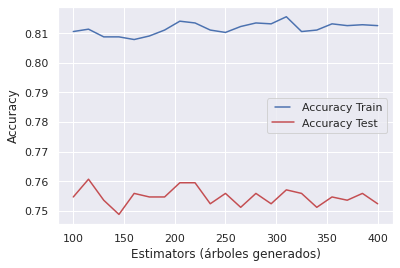

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(100, 400, 21, endpoint=True)
line1, = plt.plot(max_depths, Acu_train_random, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test_random, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Estimators (árboles generados)")
plt.show()

###**Supper Vector Machine**

####**Poly**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="poly")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 19.094899654388428
accuracy test: 0.743
accuracy train: 0.812
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       233
           1       0.73      0.55      0.63       198
           2       0.66      0.51      0.57       194
           3       0.62      0.88      0.72       219

    accuracy                           0.74       844
   macro avg       0.75      0.73      0.72       844
weighted avg       0.75      0.74      0.74       844



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.731 (+/- 0.02532)


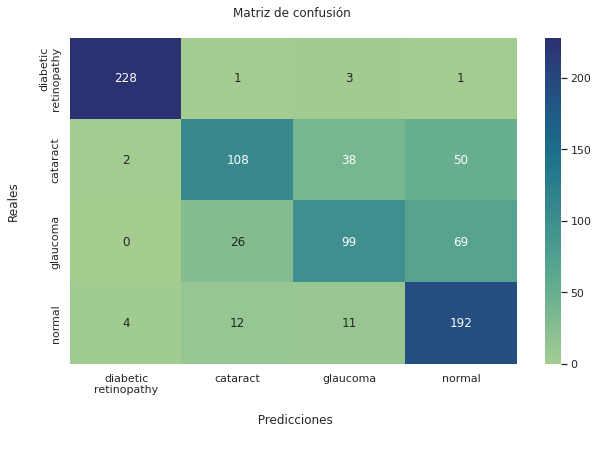

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

####**Linear**

In [ ]:
inicio = time.time()

estimador = SVC(kernel="linear")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 37.713358640670776
accuracy test: 0.735
accuracy train: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.59      0.79      0.68       198
           2       0.63      0.53      0.57       194
           3       0.70      0.59      0.64       219

    accuracy                           0.73       844
   macro avg       0.73      0.73      0.72       844
weighted avg       0.74      0.73      0.73       844



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.735 (+/- 0.01406)


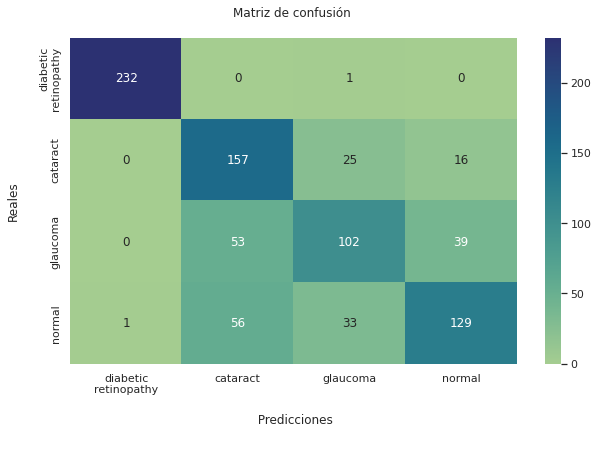

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

####**Sigmoid**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="sigmoid")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 22.671860456466675
accuracy test: 0.293
accuracy train: 0.270
              precision    recall  f1-score   support

           0       0.27      0.50      0.35       233
           1       0.30      0.56      0.39       198
           2       0.00      0.00      0.00       194
           3       0.50      0.09      0.15       219

    accuracy                           0.29       844
   macro avg       0.27      0.29      0.22       844
weighted avg       0.27      0.29      0.23       844



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.267 (+/- 0.01182)


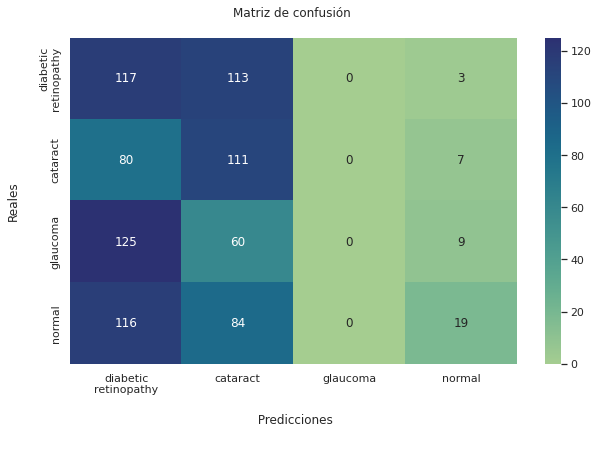

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

####**RBF**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="rbf")
estimador.fit(X_train, y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 30.050700902938843
accuracy test: 0.722
accuracy train: 0.782
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       233
           1       0.67      0.59      0.63       198
           2       0.61      0.44      0.51       194
           3       0.60      0.80      0.69       219

    accuracy                           0.72       844
   macro avg       0.71      0.71      0.70       844
weighted avg       0.72      0.72      0.71       844



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.738 (+/- 0.01230)


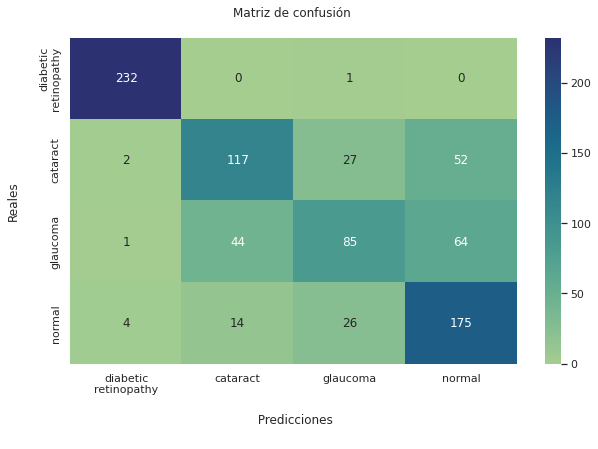

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

#**Glaucoma vs Otros (sin PCA)**

##**Montar drive**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/datasetv2')
print(os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/datasetv2


In [ ]:
ruta = './' #ruta donde están las carpetas de las clases
#entradas_dir = os.listdir( ruta ) #listdir() devuelve una lista que contiene los nombres de las entradas en el directorio dado por ruta.
entradas_dir = ['otro', 'glaucoma']
for carpeta in entradas_dir: #recorremos toda la carpeta "dataset", la cual contiene cada carpeta de cada clase
  print(carpeta)

otro
glaucoma


##**Cargando clases**

In [ ]:
ruta = './' #ruta donde están las carpetas de las clases
entradas_dir = os.listdir( ruta ) #listdir() devuelve una lista que contiene los nombres de las entradas en el directorio dado por ruta.
for carpeta in entradas_dir: #recorremos toda la carpeta "dataset", la cual contiene cada carpeta de cada clase
  print(carpeta)

Otras
Glaucoma


In [ ]:
entradas_glaucoma = os.listdir('./Glaucoma')
entradas_otro = os.listdir('./Otras')

t = (len(entradas_glaucoma), len(entradas_otro))

print("Cantidad de imagenes:")
print("Glaucoma:",len(entradas_glaucoma))
print("Otras:",len(entradas_otro))
print("\nTotal: ", sum(t))

Cantidad de imagenes:
Glaucoma: 3088
Otras: 3104

Total:  6192


<BarContainer object of 2 artists>

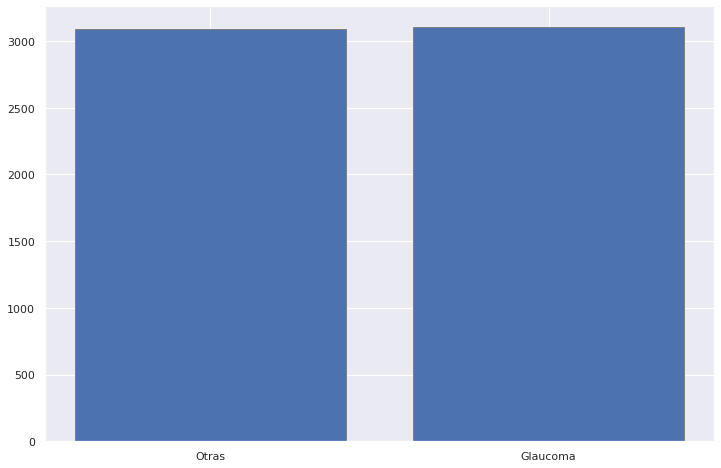

In [ ]:
fig = plt.subplots(figsize =(12, 8))
count_clases = [len(entradas_glaucoma), len(entradas_otro)]
plt.bar(entradas_dir, count_clases, color ='b', edgecolor ='grey', label ='IT')

In [ ]:
X = [] 
y = [] 
X_prueba = []
label_dict = {x:i for i, x in enumerate(entradas_dir)}
#label_dict = {"Otras": 0, "Glaucoma": 1}
print(label_dict)

{'Otras': 0, 'Glaucoma': 1}


##**Tratamiento de imágenes y etiquetas**


In [ ]:
tamaño=64

for clase in entradas_dir:
    ruta_clase_actual = os.path.join(ruta, clase)
    for i, img_nombre in enumerate(os.listdir(ruta_clase_actual)):
      
        img = cv2.imread(os.path.join(ruta_clase_actual, img_nombre)) #lee y carga una imagen en especifica de la ruta actual. Devuelve una array
        imgGRAY = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(imgGRAY, (tamaño, tamaño))
        X.append(img_resized.flatten()) #devuelve una copia del array colapsado a una única dimensión y esta la añadidos en la lista X
        y.append(label_dict[clase])

In [ ]:
print('Tamaño de X: {} \nTamaño de y: {}'.format(len(X),len(y)))

Tamaño de X: 6192 
Tamaño de y: 6192


In [ ]:
X = np.array(X) 
y = np.array(y)

print('Imagenes: {} \nLabels : {}'.format(X.shape , y.shape))

Imagenes: (6192, 4096) 
Labels : (6192,)


##**Partición de los datos para entrenamiento y testeo**
Las proporciones a utilizar son:


*   80% de las imagenes para train
*   20% de las imagenes para test

In [ ]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 68)

print('Cantidad y dimensión de los datos de: \nEntrenamiento: {} \nTest: {}'.format(X_train.shape, X_test.shape))
#3373 imagenes y cada una con 4096 "caracteristicas (pixeles)" 

Cantidad y dimensión de los datos de: 
Entrenamiento: (4953, 4096) 
Test: (1239, 4096)


##**Modelos de clasificación**

### **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimadorGNB = GaussianNB()
estimadorGNB.fit(X_train, y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predicciones = estimadorGNB.predict(X_test)
print("accuracy test: %.8f"%accuracy_score(estimadorGNB.predict(X_test), y_test))
print("accuracy train: %.8f"%accuracy_score(estimadorGNB.predict(X_train), y_train))

Tiempo de ejecución: 0.2426145076751709
accuracy test: 0.83615819
accuracy train: 0.82778114


In [ ]:
score = cross_val_score(estimadorGNB, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)) #Esto quiere decir que hacemos 10 entrenamientos independientes.
print("accuracy score: %.8f (+/- %.5f)"%(np.mean(score), np.std(score))) #El Accuracy final será el promedio de las 10 accuracies anteriores.

accuracy score: 0.82962040 (+/- 0.00508)


In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, predicciones)
print(cnf_matrix)

[[624  13]
 [190 412]]


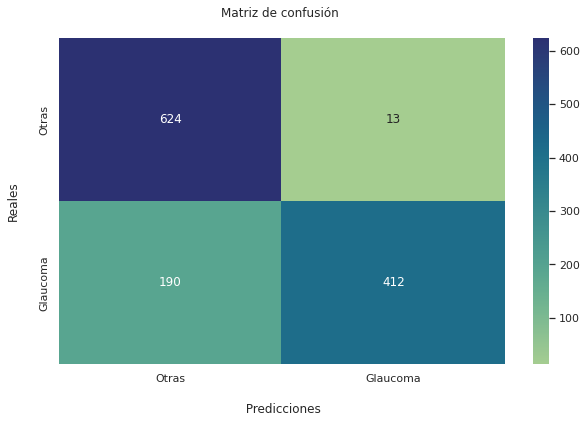

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       637
           1       0.97      0.68      0.80       602

    accuracy                           0.84      1239
   macro avg       0.87      0.83      0.83      1239
weighted avg       0.87      0.84      0.83      1239



### **DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

inicio = time.time()
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
#print("%.3f"%accuracy_score(est.predict(X_test), y_test))
predicciones = est.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(est.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(est.predict(X_train), y_train))

Tiempo de ejecución: 5.403724908828735
accuracy test: 0.865
accuracy train: 0.897


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)

predicciones = est.predict(X_test)
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.867 (+/- 0.00917)


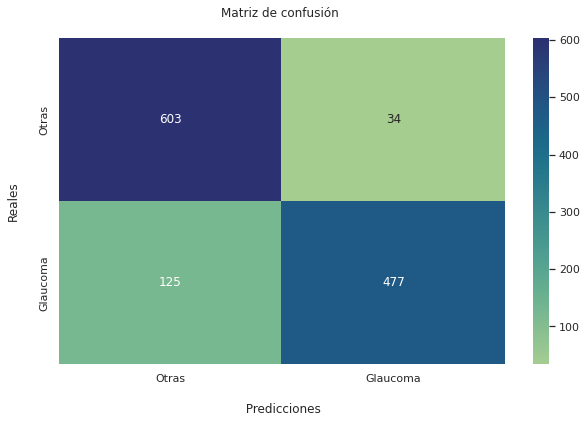

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       637
           1       0.93      0.79      0.86       602

    accuracy                           0.87      1239
   macro avg       0.88      0.87      0.87      1239
weighted avg       0.88      0.87      0.87      1239



####**¿Por qué una profundidad igual a 6?**

In [ ]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    x_train_pred = dtree.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

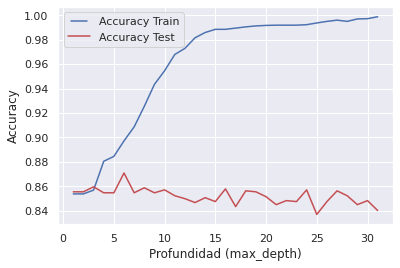

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimador = RandomForestClassifier(max_depth=6, n_estimators=100)
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimador.predict(X_test)
#print(accuracy_score(estimador.predict(X_test), y_test))
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))

Tiempo de ejecución: 6.361164808273315
accuracy test: 0.883
accuracy train: 0.911


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimador = RandomForestClassifier(max_depth=6, n_estimators=250)
estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.881 (+/- 0.01291)


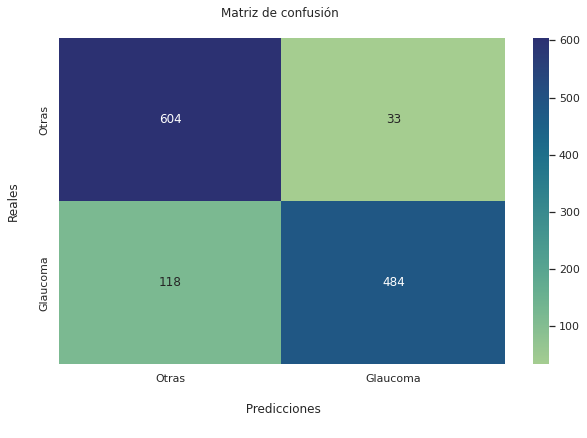

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       637
           1       0.94      0.80      0.87       602

    accuracy                           0.88      1239
   macro avg       0.89      0.88      0.88      1239
weighted avg       0.88      0.88      0.88      1239



####**¿Por qué una profundidad igual a 6?**

In [ ]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    rforest = RandomForestClassifier(max_depth=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

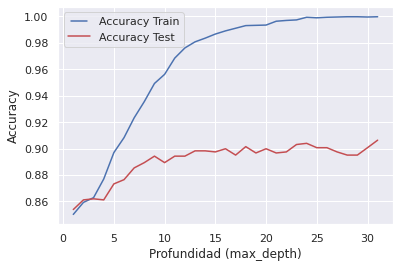

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

####**¿Por qué una generación de árboles de 100?**

In [ ]:
Acu_test_random = []
Acu_train_random = []
for i in range(100, 520, 20):
    rforest = RandomForestClassifier(max_depth=6, n_estimators=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test_random.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train_random.append(round(accuracy_score(y_train,x_train_pred),4))
    print(i)

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [ ]:
print(Acu_test_random)
print(Acu_train_random)

[0.8814, 0.8805, 0.8789, 0.8797, 0.8805, 0.8781, 0.8789, 0.8789, 0.8814, 0.8797, 0.8797, 0.8805, 0.8797, 0.8797, 0.8805, 0.8805, 0.8797, 0.8797, 0.8789, 0.8805, 0.8797]
[0.9106, 0.9104, 0.9102, 0.9106, 0.9118, 0.9085, 0.911, 0.9098, 0.91, 0.9095, 0.9134, 0.9106, 0.9106, 0.9091, 0.9106, 0.9102, 0.9112, 0.911, 0.9112, 0.91, 0.9108]


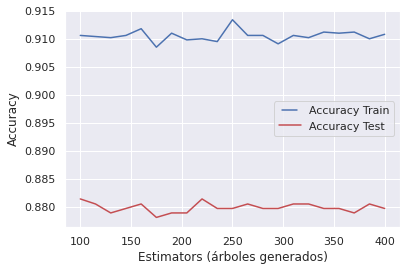

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(100, 400, 21, endpoint=True)
line1, = plt.plot(max_depths, Acu_train_random, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test_random, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Estimators (árboles generados)")
plt.show()

###**Supper Vector Machine**

####**Poly**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="poly")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 37.6191463470459
accuracy test: 0.861
accuracy train: 0.853
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       637
           1       0.98      0.73      0.84       602

    accuracy                           0.86      1239
   macro avg       0.89      0.86      0.86      1239
weighted avg       0.89      0.86      0.86      1239



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.845 (+/- 0.00767)


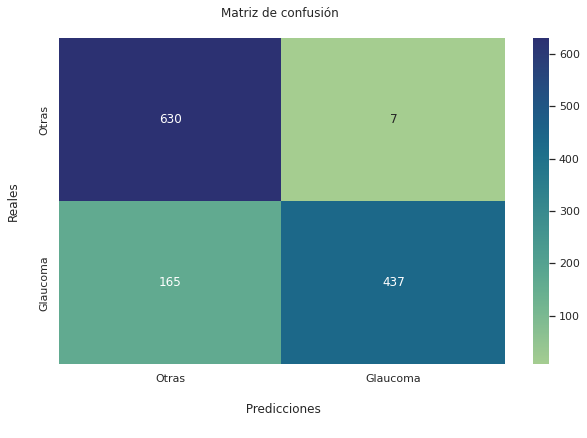

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

####**Linear**

In [ ]:
inicio = time.time()

estimador = SVC(kernel="linear")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 49.3417546749115
accuracy test: 0.868
accuracy train: 1.000
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       637
           1       0.86      0.87      0.86       602

    accuracy                           0.87      1239
   macro avg       0.87      0.87      0.87      1239
weighted avg       0.87      0.87      0.87      1239



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.854 (+/- 0.00576)


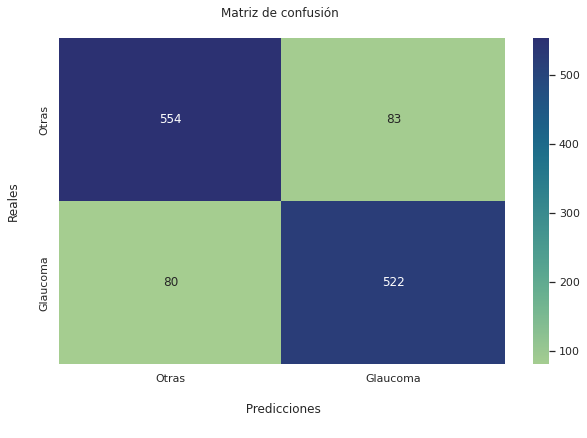

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

####**Sigmoid**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="sigmoid")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 43.644078731536865
accuracy test: 0.592
accuracy train: 0.610
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       637
           1       0.57      0.68      0.62       602

    accuracy                           0.59      1239
   macro avg       0.60      0.59      0.59      1239
weighted avg       0.60      0.59      0.59      1239



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.623 (+/- 0.00700)


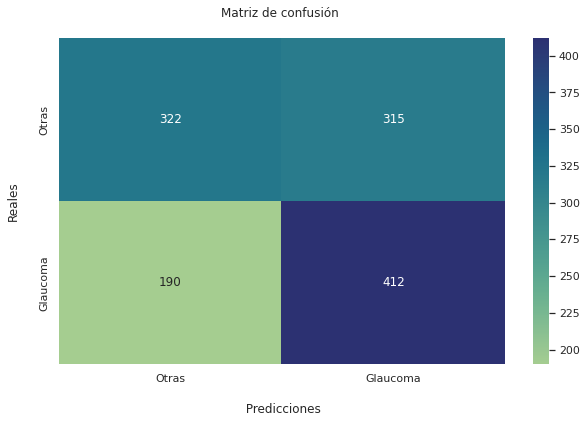

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

####**RBF**

In [ ]:
inicio = time.time()
estimador = SVC(kernel="rbf")
estimador.fit(X_train, y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 29.277229070663452
accuracy test: 0.851
accuracy train: 0.856
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       637
           1       0.93      0.75      0.83       602

    accuracy                           0.85      1239
   macro avg       0.87      0.85      0.85      1239
weighted avg       0.86      0.85      0.85      1239



In [ ]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.853 (+/- 0.01226)


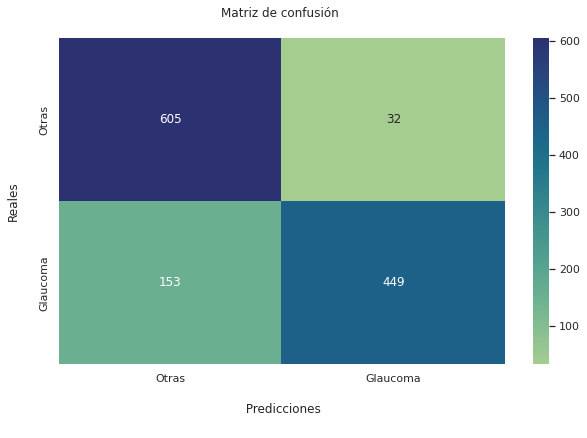

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

#**Red neuronal (sin PCA)**

### **Normalizar las imagenes**
Antes de trabajar las imagenes con los modelos de deep learning, es pertinente reescalar dichas imagenes. Por lo tanto,


*   Se dividen entre 255 (dado que el pixel más alto de una imagen es el valor de 255).

Si no se escalan de esta manera, el costo aumentará.




In [15]:
X_train = X_train.reshape([-1, 64,64, 1])
X_test = X_test.reshape([-1, 64,64, 1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)


print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



x_train shape: (3373, 64, 64, 1)
Number of images in x_train 3373
Number of images in x_test 844
(3373, 64, 64, 1) (3373,) (844, 64, 64, 1) (844,)


###**ONE-HOT ENCODING**

In [16]:
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=4)
print(y_train_ohe.shape, y_test_ohe.shape)

(3373, 4) (844, 4)


###**Arquitectura y entrenamiento de la red DNN**

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[64,64,1]),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2097664   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,245,700
Trainable params: 2,245,700
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  #AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
inicio = time.time()
history = model.fit(X_train,
          y_train_ohe,
          epochs=30,
          batch_size=256,
          validation_split = 0.2)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)


Epoch 1/30
11/11 [==============================] - 3s 106ms/step - loss: 1.5158 - accuracy: 0.3462 - val_loss: 1.1811 - val_accuracy: 0.3970
Epoch 2/30
11/11 [==============================] - 1s 88ms/step - loss: 1.1142 - accuracy: 0.4526 - val_loss: 1.0034 - val_accuracy: 0.5141
Epoch 3/30
11/11 [==============================] - 1s 82ms/step - loss: 0.9983 - accuracy: 0.5196 - val_loss: 0.9609 - val_accuracy: 0.5363
Epoch 4/30
11/11 [==============================] - 1s 83ms/step - loss: 0.9514 - accuracy: 0.5523 - val_loss: 0.8747 - val_accuracy: 0.6089
Epoch 5/30
11/11 [==============================] - 1s 81ms/step - loss: 0.8845 - accuracy: 0.5890 - val_loss: 0.8589 - val_accuracy: 0.5778
Epoch 6/30
11/11 [==============================] - 1s 80ms/step - loss: 0.8157 - accuracy: 0.6242 - val_loss: 0.8122 - val_accuracy: 0.6074
Epoch 7/30
11/11 [==============================] - 1s 82ms/step - loss: 0.7787 - accuracy: 0.6483 - val_loss: 0.7675 - val_accuracy: 0.6681
Epoch 8/30
1

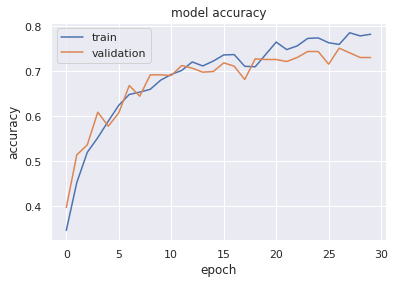

In [20]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')

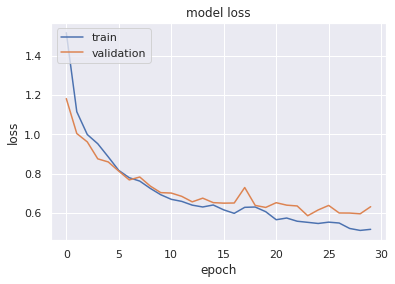

In [21]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###**Probando con SGD**

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
inicio = time.time()
history = model.fit(X_train,
          y_train_ohe,
          epochs=30,
          batch_size=256,
          validation_split=0.2)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

Epoch 1/30
11/11 [==============================] - 3s 150ms/step - loss: 1.3401 - accuracy: 0.3769 - val_loss: 1.2749 - val_accuracy: 0.4089
Epoch 2/30
11/11 [==============================] - 1s 71ms/step - loss: 1.2390 - accuracy: 0.4663 - val_loss: 1.1922 - val_accuracy: 0.5215
Epoch 3/30
11/11 [==============================] - 1s 67ms/step - loss: 1.1819 - accuracy: 0.5007 - val_loss: 1.1418 - val_accuracy: 0.5348
Epoch 4/30
11/11 [==============================] - 1s 65ms/step - loss: 1.1301 - accuracy: 0.5489 - val_loss: 1.1084 - val_accuracy: 0.5141
Epoch 5/30
11/11 [==============================] - 1s 69ms/step - loss: 1.0907 - accuracy: 0.5660 - val_loss: 1.0666 - val_accuracy: 0.5941
Epoch 6/30
11/11 [==============================] - 1s 65ms/step - loss: 1.0570 - accuracy: 0.5886 - val_loss: 1.0405 - val_accuracy: 0.5363
Epoch 7/30
11/11 [==============================] - 1s 65ms/step - loss: 1.0334 - accuracy: 0.5912 - val_loss: 1.0090 - val_accuracy: 0.6222
Epoch 8/30
1

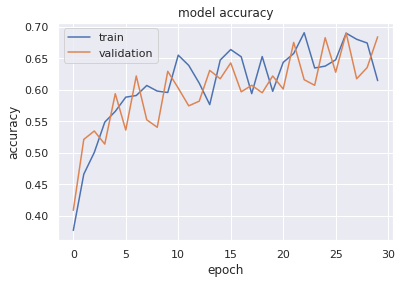

In [20]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')

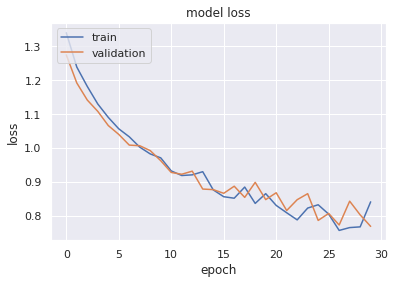

In [21]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####**Evaluación del modelo de la red (SGD)**

In [232]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

27/27 [==============================] - 0s 7ms/step - loss: 0.8052 - accuracy: 0.6220
Test accuracy: 0.6220378875732422  test_loss:  0.8051601052284241


###**Evaluación del modelo de la red (ADAM)**

In [202]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

27/27 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.7050
Test accuracy: 0.7049763202667236  test_loss:  0.6567819118499756


###**Predicciones y seguridad**

In [203]:
predictions = model.predict(X_test)
print(predictions[523])
print("valor predicho:",  np.argmax(predictions[523]), "max prob: ", np.max(predictions[523]),
      "ground truth: ", y_test[523] )

27/27 [==============================] - 0s 7ms/step
[0.00088189 0.376323   0.21221676 0.41057825]
valor predicho: 3 max prob:  0.41057825 ground truth:  1


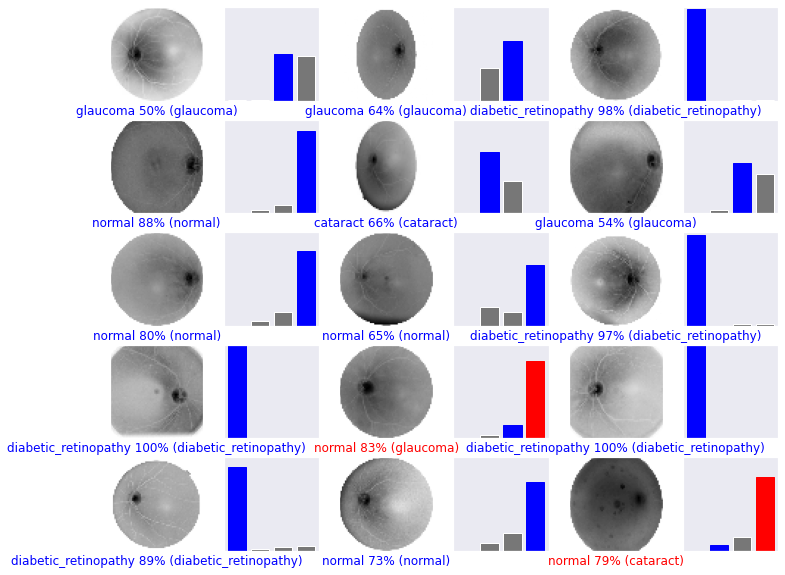

In [204]:
class_names = ['diabetic_retinopathy','cataract', 'glaucoma', 'normal']

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(64, 64), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
i = 20

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

###**Matriz de confusión**

In [207]:
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

(844, 4)
matrix de confusión en test
 [[232   0   1   0]
 [  0  63  59  76]
 [  0  14 106  74]
 [  3   2  20 194]]
verifica número de imágenes en total por fila
[233 198 194 219]


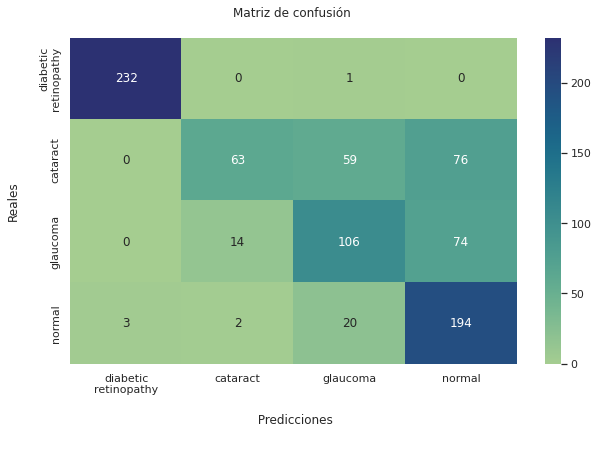

In [208]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, labels_pred), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

#**Modelos de clasificación utilizando PCA**

###**Reducción de dimensiones mediante PCA**

Text(0, 0.5, 'Varianza')

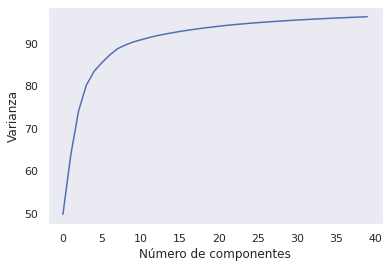

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')

### **GaussianNB**

In [243]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
inicio = time.time()
estimadorGNB = GaussianNB() #var_smoothing=4.328761281083062e-05
estimadorGNB.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimadorGNB.predict(X_test)
print("accuracy test: %.8f"%accuracy_score(estimadorGNB.predict(X_test), y_test))
print("accuracy train: %.8f"%accuracy_score(estimadorGNB.predict(X_train), y_train))

Tiempo de ejecución: 0.007099151611328125
accuracy test: 0.59834123
accuracy train: 0.60687815


In [244]:
score = cross_val_score(estimadorGNB, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)) #Esto quiere decir que hacemos 10 entrenamientos independientes.
print("accuracy score: %.8f (+/- %.5f)"%(np.mean(score), np.std(score))) #El Accuracy final será el promedio de las 10 accuracies anteriores.

accuracy score: 0.60155182 (+/- 0.01518)


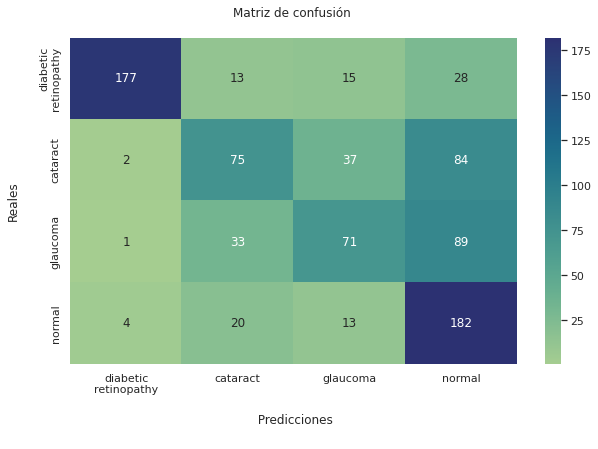

In [245]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [246]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       233
           1       0.53      0.38      0.44       198
           2       0.52      0.37      0.43       194
           3       0.48      0.83      0.60       219

    accuracy                           0.60       844
   macro avg       0.62      0.58      0.58       844
weighted avg       0.63      0.60      0.59       844



### **DecisionTree Classifier**

In [247]:
from sklearn.tree import DecisionTreeClassifier

inicio = time.time()
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
#print("%.3f"%accuracy_score(est.predict(X_test), y_test))
predicciones = est.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(est.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(est.predict(X_train), y_train))

Tiempo de ejecución: 0.12659382820129395
accuracy test: 0.629
accuracy train: 0.732


In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#est = DecisionTreeClassifier(max_depth=6)
#est.fit(X_train,y_train)
#predicciones = est.predict(X_test)
s = cross_val_score(est, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.647 (+/- 0.01268)


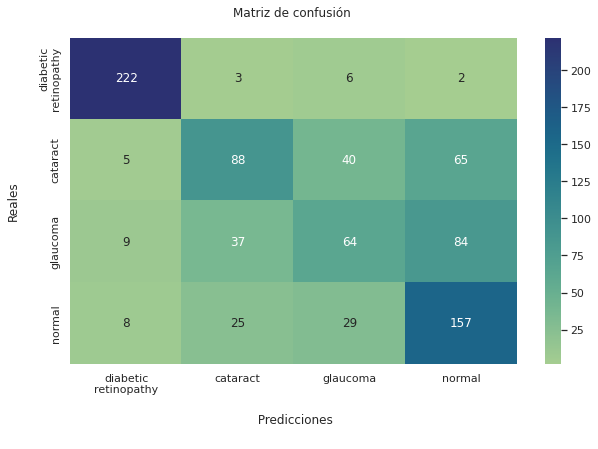

In [249]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [250]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       233
           1       0.58      0.44      0.50       198
           2       0.46      0.33      0.38       194
           3       0.51      0.72      0.60       219

    accuracy                           0.63       844
   macro avg       0.61      0.61      0.60       844
weighted avg       0.62      0.63      0.62       844



####**¿Por qué una profundidad igual a 6?**

In [251]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    x_train_pred = dtree.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

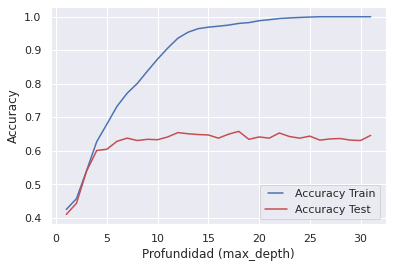

In [252]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

### **Random Forest Classifier**

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimador = RandomForestClassifier(max_depth=6, n_estimators=120)
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimador.predict(X_test)
#print(accuracy_score(estimador.predict(X_test), y_test))
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))

Tiempo de ejecución: 1.431614875793457
accuracy test: 0.709
accuracy train: 0.821


In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#estimador = RandomForestClassifier(max_depth=6, n_estimators=250)
#estimador.fit(X_train, y_train)
#predicciones = estimador.predict(X_test)
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.736 (+/- 0.01186)


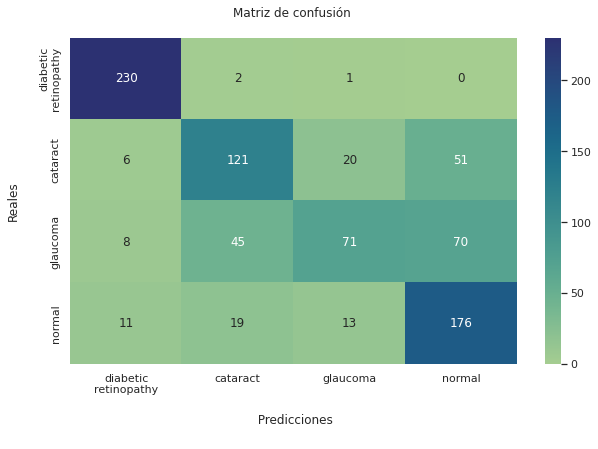

In [255]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

In [256]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       233
           1       0.65      0.61      0.63       198
           2       0.68      0.37      0.47       194
           3       0.59      0.80      0.68       219

    accuracy                           0.71       844
   macro avg       0.70      0.69      0.68       844
weighted avg       0.71      0.71      0.69       844



####**¿Por qué una profundidad igual a 6?**

In [257]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    rforest = RandomForestClassifier(max_depth=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

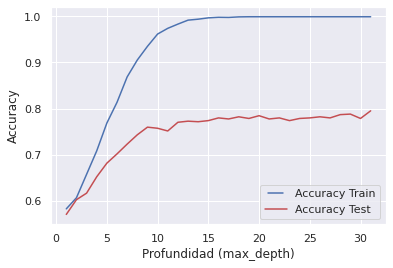

In [258]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

####**¿Por qué una generación de árboles entre 100 y 120?**

In [259]:
Acu_test_random = []
Acu_train_random = []
for i in range(100, 520, 20):
    rforest = RandomForestClassifier(max_depth=6, n_estimators=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test_random.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train_random.append(round(accuracy_score(y_train,x_train_pred),4))
    print(i)

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


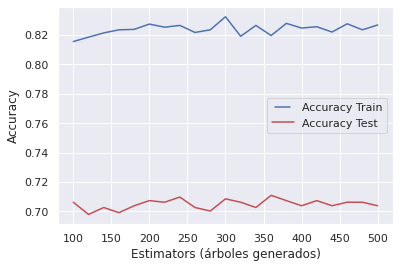

In [260]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(100, 500, 21, endpoint=True)
line1, = plt.plot(max_depths, Acu_train_random, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test_random, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Estimators (árboles generados)")
plt.show()

###**Supper Vector Machine**

####**Poly**

In [261]:
inicio = time.time()
estimador = SVC(kernel="poly")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 0.5971577167510986
accuracy test: 0.649
accuracy train: 0.700
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       233
           1       0.73      0.48      0.58       198
           2       0.66      0.25      0.36       194
           3       0.46      0.88      0.60       219

    accuracy                           0.65       844
   macro avg       0.70      0.63      0.62       844
weighted avg       0.71      0.65      0.63       844



In [262]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.660 (+/- 0.01187)


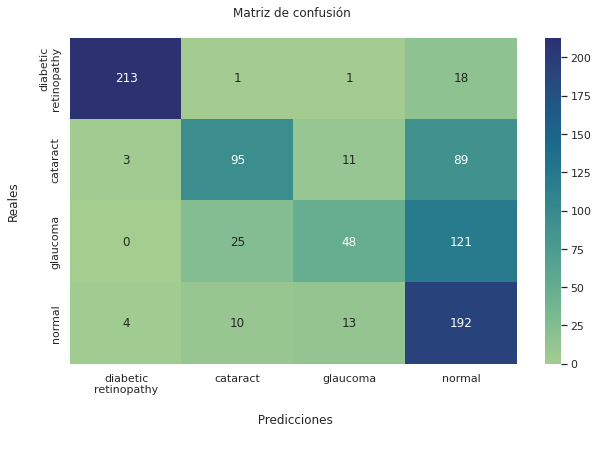

In [263]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

####**Linear(demora mucho)**

####**Sigmoid**

In [264]:
inicio = time.time()
estimador = SVC(kernel="sigmoid")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 0.8051741123199463
accuracy test: 0.427
accuracy train: 0.410
              precision    recall  f1-score   support

           0       0.54      0.71      0.62       233
           1       0.30      0.52      0.38       198
           2       0.40      0.25      0.31       194
           3       0.57      0.20      0.30       219

    accuracy                           0.43       844
   macro avg       0.45      0.42      0.40       844
weighted avg       0.46      0.43      0.41       844



In [265]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.426 (+/- 0.01920)


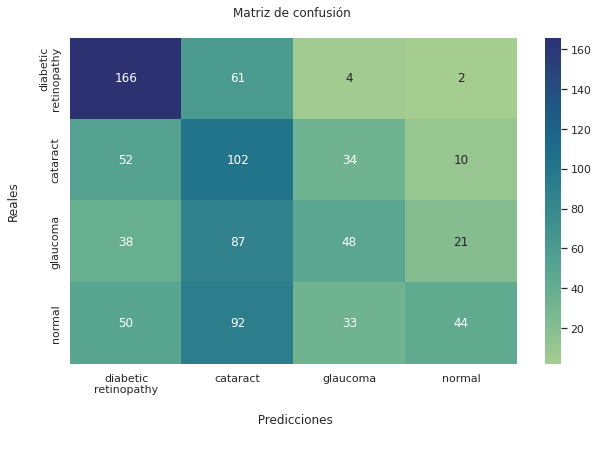

In [266]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

####**RBF**

In [267]:
inicio = time.time()
estimador = SVC(kernel="rbf")
estimador.fit(X_train, y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 1.0165338516235352
accuracy test: 0.714
accuracy train: 0.773
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       233
           1       0.64      0.60      0.62       198
           2       0.59      0.44      0.51       194
           3       0.61      0.77      0.68       219

    accuracy                           0.71       844
   macro avg       0.70      0.70      0.70       844
weighted avg       0.71      0.71      0.71       844



In [268]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.728 (+/- 0.01282)


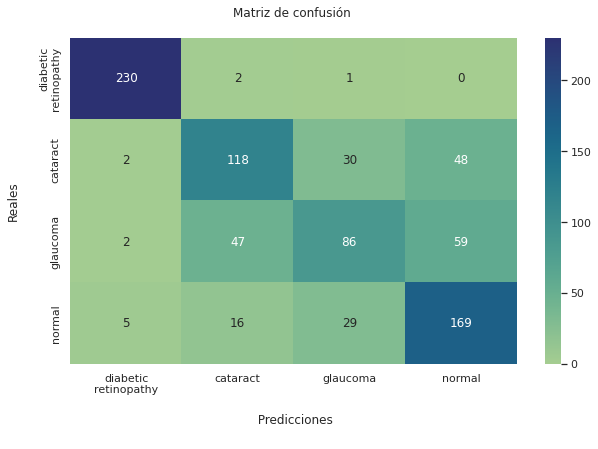

In [269]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

#**Glaucoma vs Otros utilizando PCA**

##**Montar drive**

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/datasetv2')
print(os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive/IA-Curso/Proyecto_de_IA/enfermedades_oculares/datasetv2


In [6]:
ruta = './' #ruta donde están las carpetas de las clases
entradas_dir = os.listdir( ruta ) #listdir() devuelve una lista que contiene los nombres de las entradas en el directorio dado por ruta.
for carpeta in entradas_dir: #recorremos toda la carpeta "dataset", la cual contiene cada carpeta de cada clase
  print(carpeta)

Otras
Glaucoma


##**Cargando clases**

In [7]:
entradas_glaucoma = os.listdir('./Glaucoma')
entradas_otro = os.listdir('./Otras')

t = (len(entradas_glaucoma), len(entradas_otro))

print("Cantidad de imagenes:")
print("Glaucoma:",len(entradas_glaucoma))
print("Otras:",len(entradas_otro))
print("\nTotal: ", sum(t))

Cantidad de imagenes:
Glaucoma: 3088
Otras: 3104

Total:  6192


<BarContainer object of 2 artists>

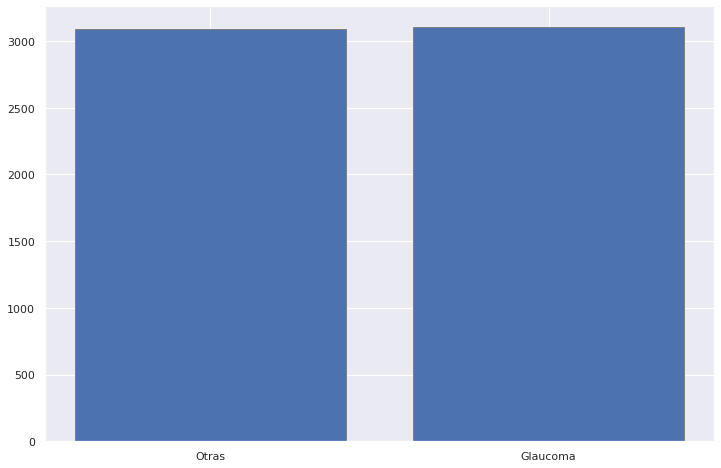

In [8]:
fig = plt.subplots(figsize =(12, 8))
count_clases = [len(entradas_glaucoma), len(entradas_otro)]
plt.bar(entradas_dir, count_clases, color ='b', edgecolor ='grey', label ='IT')

In [9]:
X = [] 
y = [] 
X_prueba = []
label_dict = {x:i for i, x in enumerate(entradas_dir)}
#label_dict = {"Otras": 0, "Glaucoma": 1}
print(label_dict)

{'Otras': 0, 'Glaucoma': 1}


##**Tratamiento de imágenes y etiquetas**


In [10]:
tamaño=64

for clase in entradas_dir:
    ruta_clase_actual = os.path.join(ruta, clase)
    for i, img_nombre in enumerate(os.listdir(ruta_clase_actual)):
      
        img = cv2.imread(os.path.join(ruta_clase_actual, img_nombre)) #lee y carga una imagen en especifica de la ruta actual. Devuelve una array
        imgGRAY = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(imgGRAY, (tamaño, tamaño))
        X.append(img_resized.flatten()) #devuelve una copia del array colapsado a una única dimensión y esta la añadidos en la lista X
        y.append(label_dict[clase])

In [11]:
print('Tamaño de X: {} \nTamaño de y: {}'.format(len(X),len(y)))

Tamaño de X: 6192 
Tamaño de y: 6192


In [12]:
X = np.array(X) 
y = np.array(y)

print('Imagenes: {} \nLabels : {}'.format(X.shape , y.shape))

Imagenes: (6192, 4096) 
Labels : (6192,)


##**Partición de los datos para entrenamiento y testeo**
Las proporciones a utilizar son:


*   80% de las imagenes para train
*   20% de las imagenes para test

In [13]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 68)

print('Cantidad y dimensión de los datos de: \nEntrenamiento: {} \nTest: {}'.format(X_train.shape, X_test.shape))
#3373 imagenes y cada una con 4096 "caracteristicas (pixeles)" 

Cantidad y dimensión de los datos de: 
Entrenamiento: (4953, 4096) 
Test: (1239, 4096)


###**Reducción de dimensiones mediante PCA**

Text(0, 0.5, 'Varianza')

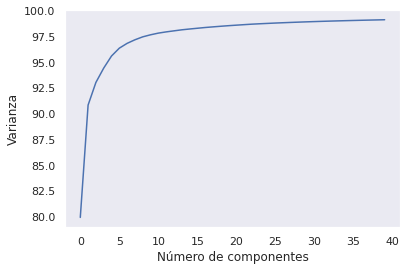

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')

##**Modelos de clasificación con PCA (Glaucoma vs Otros)**

###**Reducción de dimensiones**

Text(0, 0.5, 'Varianza')

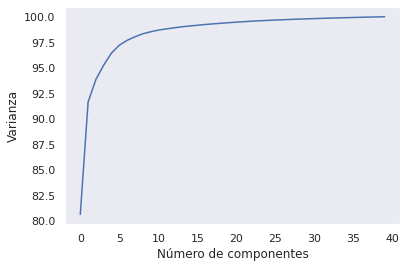

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')

### **GaussianNB**

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimadorGNB = GaussianNB()
estimadorGNB.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimadorGNB.predict(X_test)
print("accuracy test: %.8f"%accuracy_score(estimadorGNB.predict(X_test), y_test))
print("accuracy train: %.8f"%accuracy_score(estimadorGNB.predict(X_train), y_train))

Tiempo de ejecución: 0.013502120971679688
accuracy test: 0.75867635
accuracy train: 0.75307894


In [17]:
score = cross_val_score(estimadorGNB, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)) #Esto quiere decir que hacemos 10 entrenamientos independientes.
print("accuracy score: %.8f (+/- %.5f)"%(np.mean(score), np.std(score))) #El Accuracy final será el promedio de las 10 accuracies anteriores.

accuracy score: 0.75267264 (+/- 0.00774)


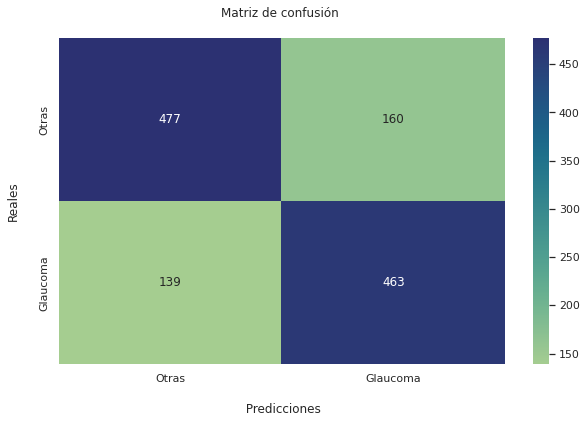

In [18]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [19]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       637
           1       0.74      0.77      0.76       602

    accuracy                           0.76      1239
   macro avg       0.76      0.76      0.76      1239
weighted avg       0.76      0.76      0.76      1239



### **DecisionTree Classifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier

inicio = time.time()
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
#print("%.3f"%accuracy_score(est.predict(X_test), y_test))
predicciones = est.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(est.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(est.predict(X_train), y_train))

Tiempo de ejecución: 0.11368751525878906
accuracy test: 0.851
accuracy train: 0.885


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#est = DecisionTreeClassifier(max_depth=6)
#est.fit(X_train,y_train)
#predicciones = est.predict(X_test)
s = cross_val_score(est, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.853 (+/- 0.01388)


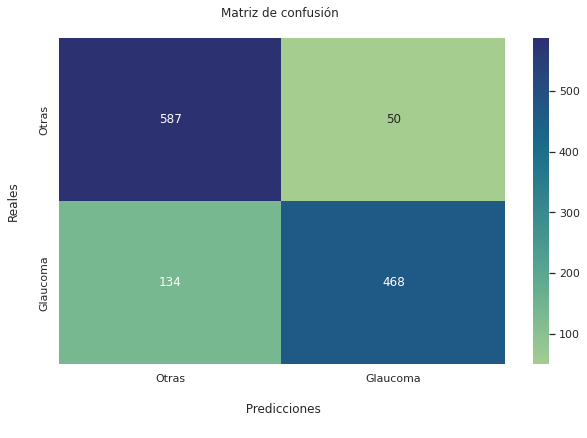

In [22]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [23]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       637
           1       0.90      0.78      0.84       602

    accuracy                           0.85      1239
   macro avg       0.86      0.85      0.85      1239
weighted avg       0.86      0.85      0.85      1239



####**¿Por qué una profundidad igual a 6?**

In [24]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    x_train_pred = dtree.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

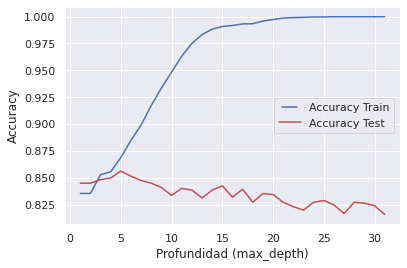

In [25]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

### **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

inicio = time.time()
estimador = RandomForestClassifier(max_depth=6, n_estimators=100)
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predicciones = estimador.predict(X_test)
#print(accuracy_score(estimador.predict(X_test), y_test))
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))

Tiempo de ejecución: 3.9855716228485107
accuracy test: 0.869
accuracy train: 0.882


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#estimador = RandomForestClassifier(max_depth=6, n_estimators=250)
#estimador.fit(X_train, y_train)
#predicciones = estimador.predict(X_test)
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.861 (+/- 0.00868)


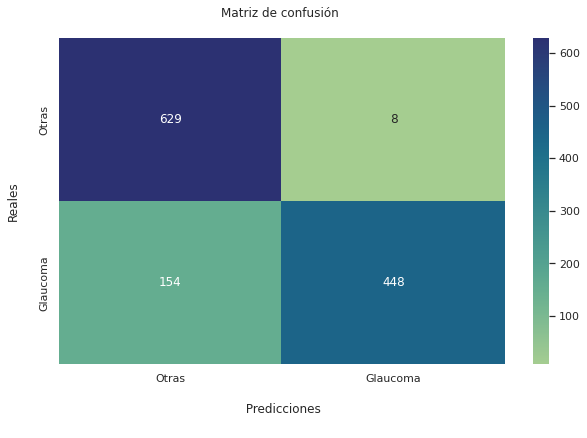

In [28]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

In [29]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       637
           1       0.98      0.74      0.85       602

    accuracy                           0.87      1239
   macro avg       0.89      0.87      0.87      1239
weighted avg       0.89      0.87      0.87      1239



####**¿Por qué una profundidad igual a 6?**

In [30]:
Acu_test = []
Acu_train = []
for i in range(1,32):
    rforest = RandomForestClassifier(max_depth=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train.append(round(accuracy_score(y_train,x_train_pred),4))

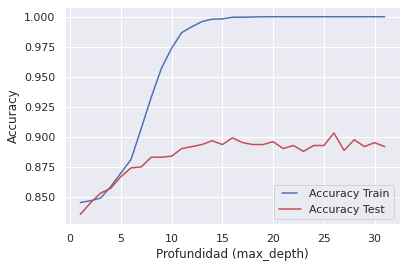

In [31]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 31, 31, endpoint=True)
line1, = plt.plot(max_depths, Acu_train, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Profundidad (max_depth)")
plt.show()

####**¿Por qué una generación de árboles 100?**

In [32]:
Acu_test_random = []
Acu_train_random = []
for i in range(100, 520, 20):
    rforest = RandomForestClassifier(max_depth=6, n_estimators=i)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(X_test)
    x_train_pred = rforest.predict(X_train)
    Acu_test_random.append(round(accuracy_score(y_test,y_pred),4))
    Acu_train_random.append(round(accuracy_score(y_train,x_train_pred),4))
    print(i)

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


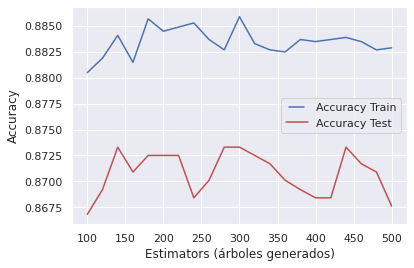

In [33]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(100, 500, 21, endpoint=True)
line1, = plt.plot(max_depths, Acu_train_random, "b", label="Accuracy Train")
line2, = plt.plot(max_depths, Acu_test_random, "r", label="Accuracy Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Estimators (árboles generados)")
plt.show()

###**Supper Vector Machine**

####**Poly**

In [34]:
inicio = time.time()
estimador = SVC(kernel="poly")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 0.6041090488433838
accuracy test: 0.856
accuracy train: 0.856
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       637
           1       0.94      0.75      0.83       602

    accuracy                           0.86      1239
   macro avg       0.87      0.85      0.85      1239
weighted avg       0.87      0.86      0.85      1239



In [35]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.854 (+/- 0.00557)


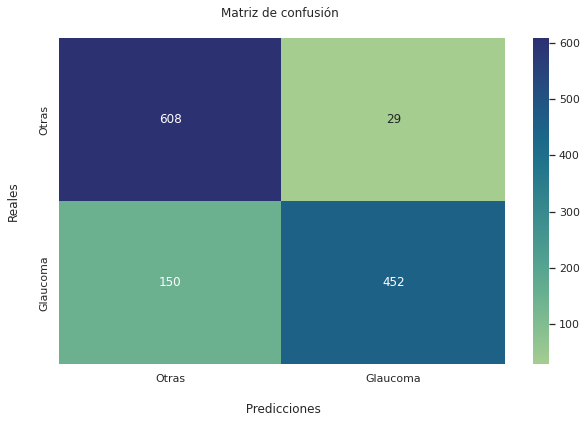

In [36]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

####**Linear**

####**Sigmoid**

In [37]:
inicio = time.time()
estimador = SVC(kernel="sigmoid")
estimador.fit(X_train, y_train)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)
predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 0.5938560962677002
accuracy test: 0.774
accuracy train: 0.783
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       637
           1       0.76      0.78      0.77       602

    accuracy                           0.77      1239
   macro avg       0.77      0.77      0.77      1239
weighted avg       0.77      0.77      0.77      1239



In [38]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.783 (+/- 0.01181)


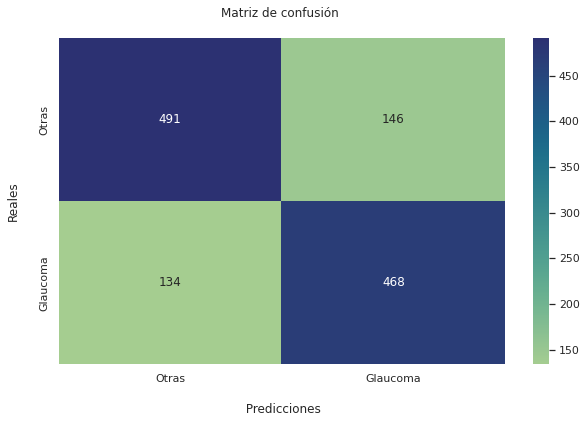

In [39]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

####**RBF**

In [40]:
inicio = time.time()
estimador = SVC(kernel="rbf")
estimador.fit(X_train, y_train)

fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

predictions=estimador.predict(X_test)
print("accuracy test: %.3f"%accuracy_score(estimador.predict(X_test), y_test)) #la Exactitud es la cantidad de predicciones positivas que fueron correctas.
print("accuracy train: %.3f"%accuracy_score(estimador.predict(X_train), y_train))
print(classification_report(y_test, predictions))


Tiempo de ejecución: 0.9997615814208984
accuracy test: 0.851
accuracy train: 0.853
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       637
           1       0.94      0.75      0.83       602

    accuracy                           0.85      1239
   macro avg       0.87      0.85      0.85      1239
weighted avg       0.86      0.85      0.85      1239



In [41]:
s = cross_val_score(estimador, X_train, y_train, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.851 (+/- 0.01125)


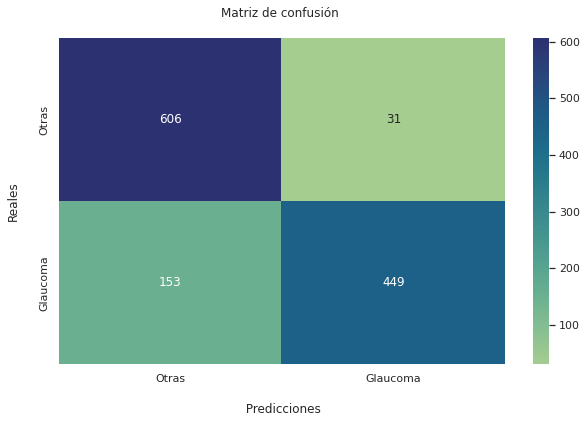

In [42]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['Otras','Glaucoma'])
fx.yaxis.set_ticklabels(['Otras','Glaucoma'])
plt.show()

#**Red neuronal profunda utilizando PCA**

### **Normalizar las imagenes**
Antes de trabajar las imagenes con los modelos de deep learning, es pertinente reescalar dichas imagenes. Por lo tanto,


*   Se dividen entre 255 (dado que el pixel más alto de una imagen es el valor de 255).

Si no se escalan de esta manera, el costo aumentará.




In [16]:
print("Train images shape:", X_train.shape)
print("Test images shape: ", X_test.shape)

Train images shape: (3373, 40)
Test images shape:  (844, 40)


In [17]:
X_train = X_train.reshape([-1, 40, 1])
X_test = X_test.reshape([-1, 40, 1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)


print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



x_train shape: (3373, 40, 1)
Number of images in x_train 3373
Number of images in x_test 844
(3373, 40, 1) (3373,) (844, 40, 1) (844,)


###**ONE-HOT ENCODING**

In [18]:
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=4)
print(y_train_ohe.shape, y_test_ohe.shape)

(3373, 4) (844, 4)


###**Arquitectura y entrenamiento de la red DNN**

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[40,]),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 5,300
Trainable params: 5,300
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  #SGD()AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
inicio = time.time()
history = model.fit(X_train,
          y_train_ohe,
          epochs=30,
          batch_size=256,
          validation_split=0.2)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

Epoch 1/30
11/11 [==============================] - 1s 28ms/step - loss: 1.6828 - accuracy: 0.2480 - val_loss: 1.3626 - val_accuracy: 0.3052
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 1.2746 - accuracy: 0.4099 - val_loss: 1.2119 - val_accuracy: 0.4444
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 1.1710 - accuracy: 0.4804 - val_loss: 1.1257 - val_accuracy: 0.5022
Epoch 4/30
11/11 [==============================] - 0s 7ms/step - loss: 1.0874 - accuracy: 0.5219 - val_loss: 1.0521 - val_accuracy: 0.5526
Epoch 5/30
11/11 [==============================] - 0s 8ms/step - loss: 1.0174 - accuracy: 0.5474 - val_loss: 0.9925 - val_accuracy: 0.5719
Epoch 6/30
11/11 [==============================] - 0s 7ms/step - loss: 0.9543 - accuracy: 0.5712 - val_loss: 0.9369 - val_accuracy: 0.6030
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 0.8952 - accuracy: 0.6093 - val_loss: 0.8824 - val_accuracy: 0.6400
Epoch 8/30
11/11 [=

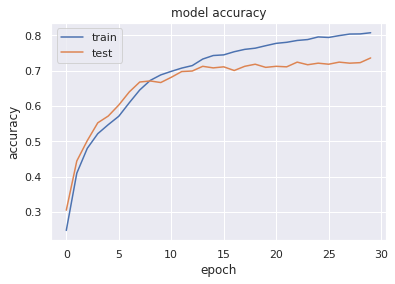

In [22]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

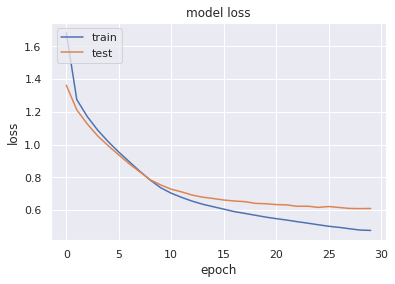

In [23]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###**Probando con el optimizador SGD**

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #SGD()AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
inicio = time.time()
history = model.fit(X_train,
          y_train_ohe,
          epochs=30,
          batch_size=256,
          validation_split = 0.2)
fin = time.time()
print("Tiempo de ejecución:", fin-inicio)

Epoch 1/30
11/11 [==============================] - 1s 17ms/step - loss: 1.5312 - accuracy: 0.3328 - val_loss: 1.3711 - val_accuracy: 0.3511
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 1.3521 - accuracy: 0.3521 - val_loss: 1.2787 - val_accuracy: 0.3748
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 1.2818 - accuracy: 0.3732 - val_loss: 1.2302 - val_accuracy: 0.3956
Epoch 4/30
11/11 [==============================] - 0s 3ms/step - loss: 1.2392 - accuracy: 0.3877 - val_loss: 1.1975 - val_accuracy: 0.4089
Epoch 5/30
11/11 [==============================] - 0s 3ms/step - loss: 1.2077 - accuracy: 0.4010 - val_loss: 1.1731 - val_accuracy: 0.4133
Epoch 6/30
11/11 [==============================] - 0s 3ms/step - loss: 1.1827 - accuracy: 0.4203 - val_loss: 1.1533 - val_accuracy: 0.4237
Epoch 7/30
11/11 [==============================] - 0s 3ms/step - loss: 1.1616 - accuracy: 0.4329 - val_loss: 1.1361 - val_accuracy: 0.4370
Epoch 8/30
11/11 [=

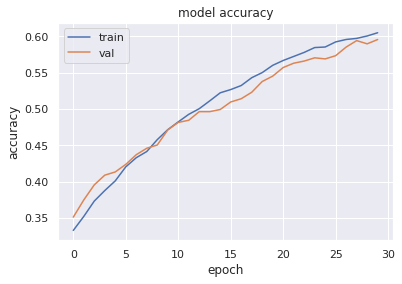

In [25]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')

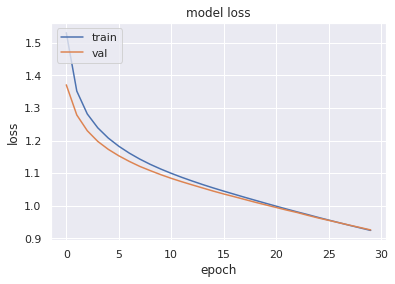

In [23]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

27/27 [==============================] - 0s 954us/step - loss: 0.9442 - accuracy: 0.5889
Test accuracy: 0.5888625383377075  test_loss:  0.9441850185394287


###**Evaluación del modelo de la red**

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

27/27 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.5877
Test accuracy: 0.5876777172088623  test_loss:  0.9440430998802185


###**Predicciones y seguridad**

In [25]:
predictions = model.predict(X_test)
print(predictions[523])
print("valor predicho:",  np.argmax(predictions[523]), "max prob: ", np.max(predictions[523]),
      "ground truth: ", y_test[523] )

27/27 [==============================] - 0s 1ms/step
[0.00831733 0.56673676 0.24454278 0.18040304]
valor predicho: 1 max prob:  0.56673676 ground truth:  1


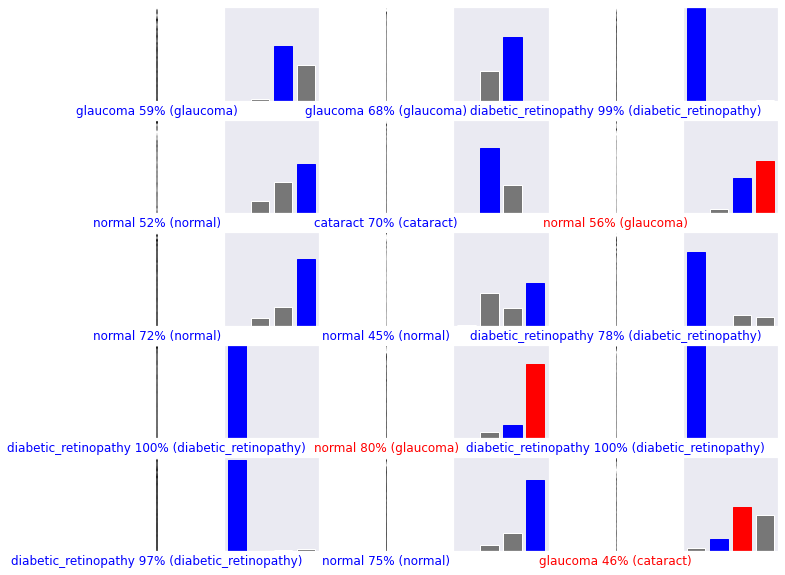

In [26]:
class_names = ['diabetic_retinopathy','cataract', 'glaucoma', 'normal']

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(40, 1), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
i = 20

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

###**Matriz de confusión**

In [27]:
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

(844, 4)
matrix de confusión en test
 [[232   0   1   0]
 [  3 106  50  39]
 [  1  27 112  54]
 [  6  15  38 160]]
verifica número de imágenes en total por fila
[233 198 194 219]


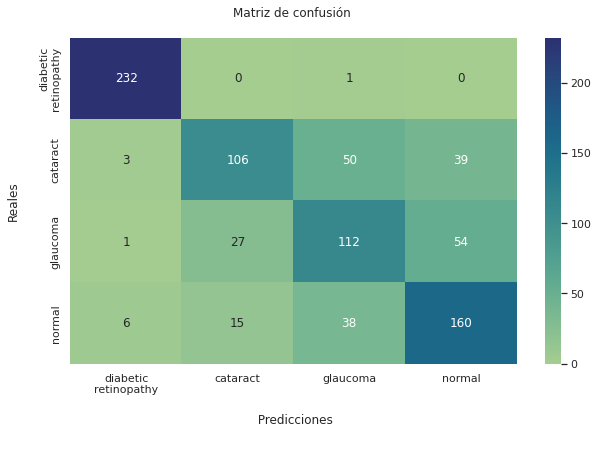

In [28]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, labels_pred), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
fx.yaxis.set_ticklabels(['diabetic\nretinopathy','cataract','glaucoma', 'normal'])
plt.show()

#**Graficas extras**

0

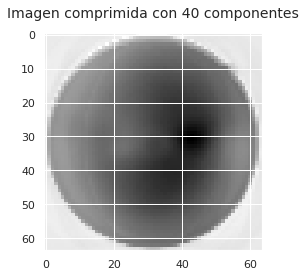

In [ ]:
X_train_recovered = pca.inverse_transform(X_train)

image_pca_40 = X_train_recovered[50].reshape([64,64])
plt.imshow(image_pca_40, cmap='gray_r')
plt.title('Imagen comprimida con 40 componentes', fontsize=14, pad=15)
y_train[50]


0

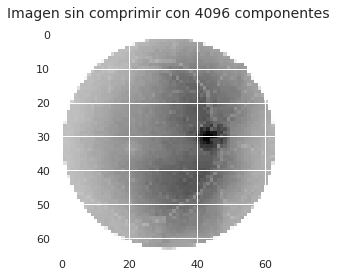

In [22]:
image_pca_40 = X_train[50].reshape([64,64])
plt.imshow(image_pca_40, cmap='gray_r')
plt.title('Imagen sin comprimir con 4096 componentes', fontsize=14, pad=15)
y_train[50]


0

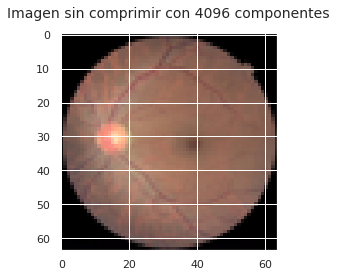

In [25]:
image_pca_40 = X_mostrar[50].reshape([64,64,3])
plt.imshow(image_pca_40)
plt.title('Imagen sin comprimir con 4096 componentes', fontsize=14, pad=15)
y_train[50]


<BarContainer object of 8 artists>

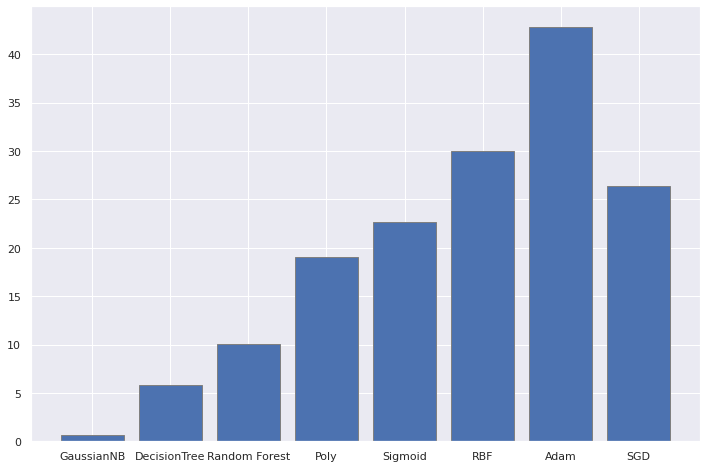

In [28]:
fig = plt.subplots(figsize =(12, 8))
tiempos = [0.6780638694763184, 5.798376798629761, 10.07237434387207, 19.094899654388428, 22.671860456466675, 30.050700902938843, 42.804864168167114, 26.41798162460327]
modelos = ['GaussianNB','DecisionTree', 'Random Forest', 'Poly', 'Sigmoid', 'RBF', 'Adam', 'SGD']
plt.bar(modelos, tiempos, color ='b', edgecolor ='grey', label ='IT')

<BarContainer object of 8 artists>

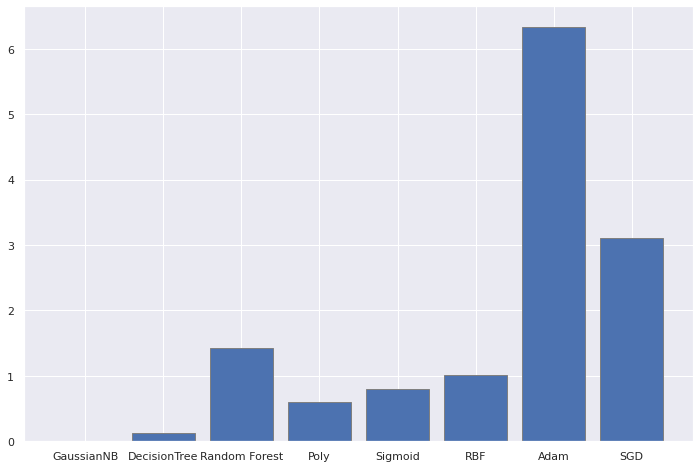

In [29]:
fig = plt.subplots(figsize =(12, 8))
tiempos2 = [0.007099151611328125, 0.12659382820129395, 1.431614875793457, 0.5971577167510986, 0.8051741123199463, 1.0165338516235352, 6.332432508468628, 3.104132652282715]
modelos2 = ['GaussianNB', 'DecisionTree','Random Forest', 'Poly', 'Sigmoid', 'RBF', 'Adam', 'SGD']
plt.bar(modelos2, tiempos2, color ='b', edgecolor ='grey', label ='IT')